In [1]:
import cv2
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt

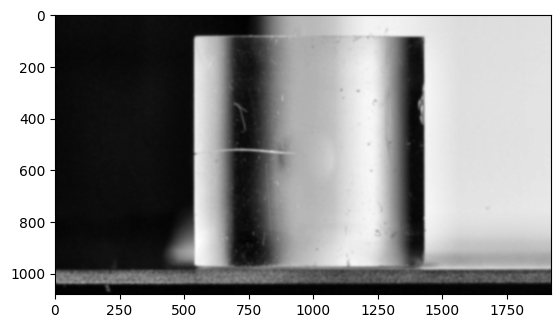

In [118]:
img = cv2.imread("O2_videos_frames/EJ200PS-1X1P-3/FaceA/frame0.png")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
im_gray = clahe.apply(im_gray)
im_gray = cv2.GaussianBlur(im_gray, (23, 23), 0)
plt.imshow(im_gray, cmap="gray")

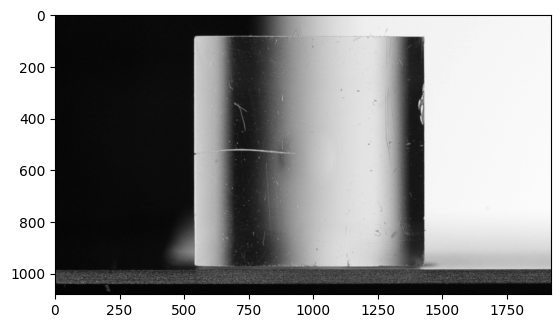

In [58]:
img = cv2.imread("O2_videos_frames/EJ200PS-1X1P-3/FaceA/frame0.png")
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap="gray")

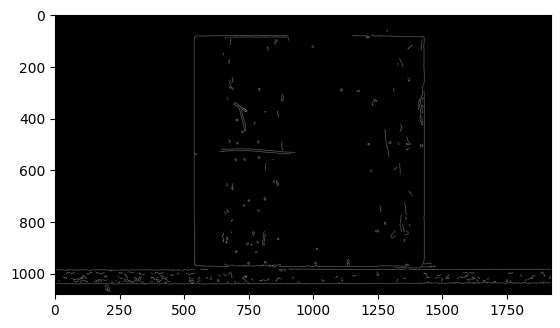

In [71]:
blurred = cv2.GaussianBlur(im_gray, (15, 15), 0)
edges = cv2.Canny(blurred, 15, 30)
plt.imshow(edges, cmap="gray")

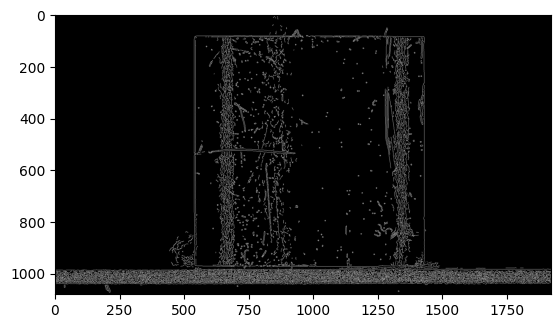

In [45]:
edges = cv2.Canny(im_gray.copy(), 3000, 5000, apertureSize=7, L2gradient=True)
plt.imshow(edges, cmap="gray")

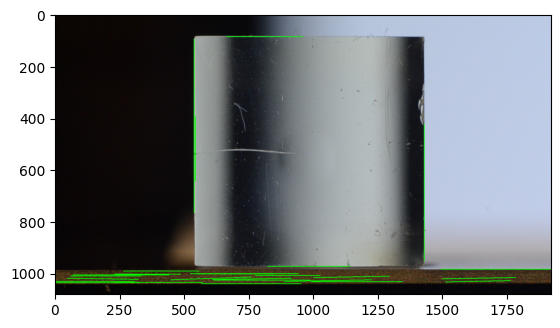

In [23]:
# Assuming you've performed Canny edge detection and got 'edges'
lines = cv2.HoughLinesP(
    edges, rho=1, theta=np.pi / 180, threshold=10, minLineLength=250, maxLineGap=10
)

# 'lines' is a 3D array containing line coordinates
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'All contours')

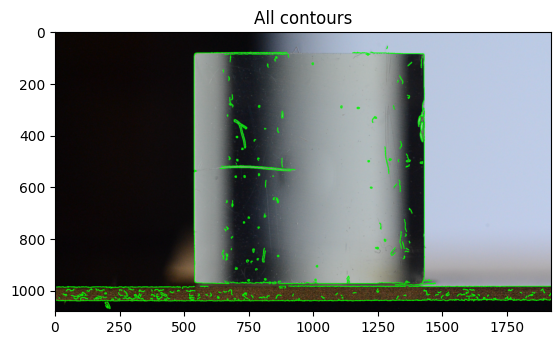

In [72]:
ctrs, hier = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img.copy(), ctrs, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("All contours")

In [46]:
expected_area = 100  # replace with the expected area of your square

# Create a new list to store the filtered contours
filtered_contours = []

for cnt in ctrs:
    area = cv2.contourArea(cnt)

    if area > expected_area:
        filtered_contours.append(cnt)

Text(0.5, 1.0, 'All contours')

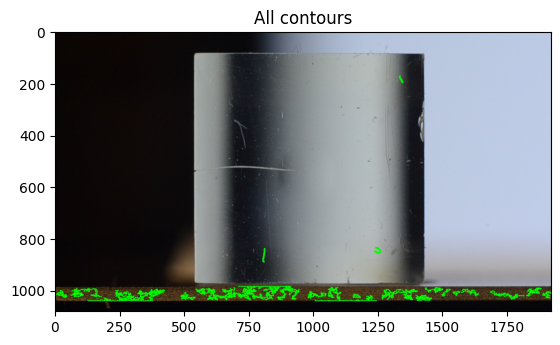

In [47]:
img_contours = cv2.drawContours(img.copy(), filtered_contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("All contours")

In [34]:
ctrs_areas = []
for cnt in ctrs:
    ctrs_areas.append(cv2.contourArea(cnt))

In [37]:
max_area = max(ctrs_areas)
print(max_area)

501.5


(array([483., 113., 129.,  55.,  27.,  30.,  15.,  17.,   8.,  12.,  10.,
          6.,   4.,   4.,   2.,   5.,   0.,   1.,   2.,   4.,   2.,   6.,
          1.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,   0.,   2.,   3.,
          0.,   0.,   2.,   1.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.   ,   5.015,  10.03 ,  15.045,  20.06 ,  25.075,  30.09 ,
         35.105,  40.12 ,  45.135,  50.15 ,  55.165,  60.18 ,  65.195,
         70.21 ,  75.225,  80.24 ,  85.255,  90.27 ,  95.285, 100.3  ,
        105.315, 110.33 , 115.345, 120.36 , 125.375, 130.39 , 135.405,
        140.42 , 145.435, 150.45 ,

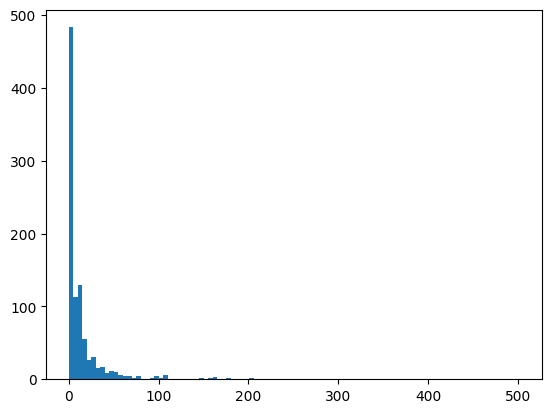

In [39]:
plt.hist(ctrs_areas, bins=100)

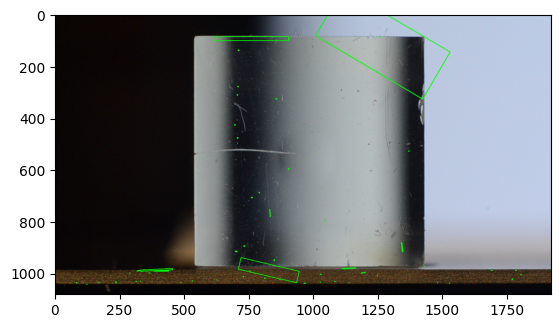

In [10]:
for cnt in ctrs:
    # Calculate the perimeter of the contour
    perimeter = cv2.arcLength(cnt, True)

    # Use approxPolyDP to approximate the shape of the contour
    epsilon = 0.02 * perimeter  # usually a good starting point for epsilon
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    # Proceed only if the approximated shape has 4 vertices
    if len(approx) == 4:
        # Get the rotating rectangle that encloses the contour
        rect = cv2.minAreaRect(approx)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(img, [box], 0, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

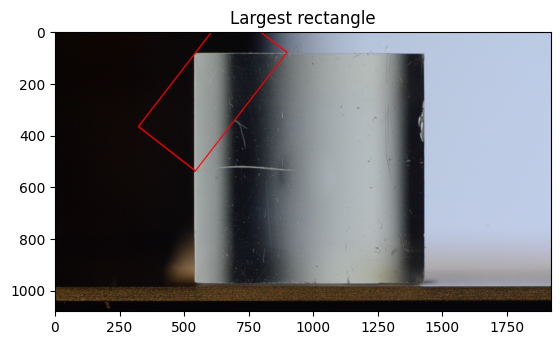

In [73]:
rects = [cv2.minAreaRect(ctr) for ctr in ctrs]
largest_rect = max(rects, key=lambda rect: rect[1][0] * rect[1][1])
box = cv2.boxPoints(largest_rect)
box = np.int0(box)
img_box = cv2.drawContours(img.copy(), [box], 0, (0, 0, 255), 3)
plt.figure()
plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
plt.title("Largest rectangle")
plt.show()

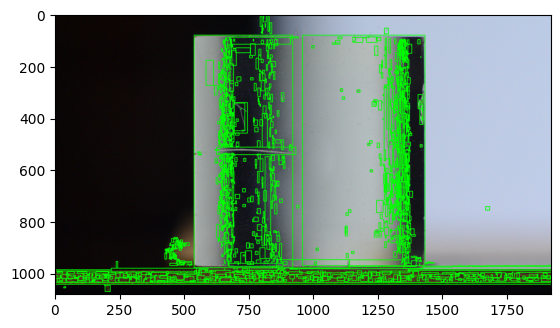

In [132]:
for cnt in ctrs:
    # Get bounding rect
    x, y, w, h = cv2.boundingRect(cnt)

    # Draw rectangle
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
angle = largest_rect[-1]

In [18]:
img_rotated = ndimage.rotate(img, angle)

In [21]:
cv2.imwrite("AlphaSource/EJ200PS-L8R_00016_rot.png", img_rotated)

True